In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import re
import pandas as pd
import numpy as np
import sys
sys.path.append(r"C:\Users\Daniel\Desktop\Projects\project-pandas\src")
from cleaning import*

In [80]:
#Some configuration for matplotlib and seaborn to look pretty
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [81]:
#I get the previously analized data
df = pd.read_csv('output/analized_data.csv')

In [82]:
#I clean the indices
df = df.set_index('Unnamed: 0')
df.index.name = None

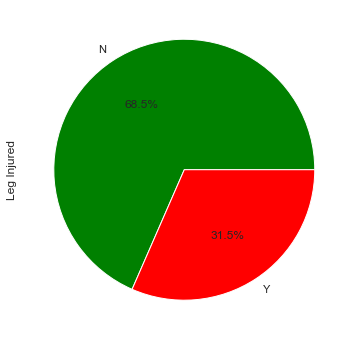

In [83]:
#Percentage of leg injuries from non-surfers
data = df[(df["Activity"] != "Surfing")]["Leg Injured"].value_counts()
plot_ = data.plot.pie(autopct="%.1f%%", colors = ['Green', 'Red'])
plot_.figure.savefig("output/images/non_surfer_leg_injuries.png", dpi=1000)

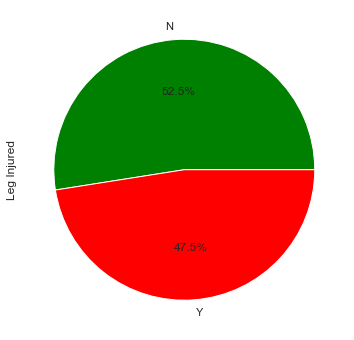

In [84]:
#Percentage of leg injuries from surfers
data = df[(df["Activity"] == "Surfing")]["Leg Injured"].value_counts()
plot_ = data.plot.pie(autopct="%.1f%%", colors = ['Green', 'Red'])
plot_.figure.savefig("output/images/surfer_leg_injuries.png", dpi=1000)

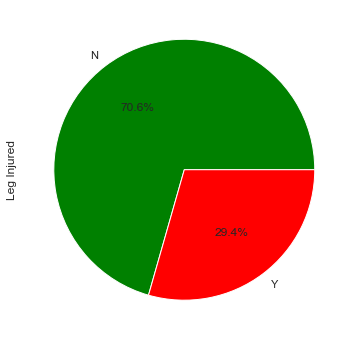

In [85]:
#Counting only FATAL injuries
#First non-surfers
data = df[(df["Activity"] != "Surfing") & (df["Fatal (Y/N)"] == "Y")]["Leg Injured"].value_counts()
plot_ = data.plot.pie(autopct="%.1f%%", colors = ['Green', 'Red'])
plot_.figure.savefig("output/images/fatal_non_surfer_leg_injuries.png", dpi=1000)

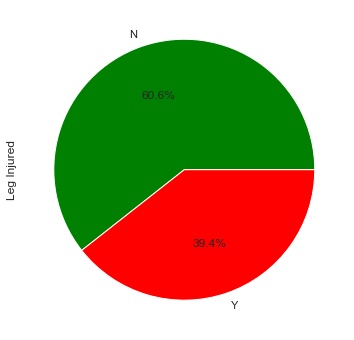

In [86]:
#Now only surfers
data = df[(df["Activity"] == "Surfing") & (df["Fatal (Y/N)"] == "Y")]["Leg Injured"].value_counts()
plot_ = data.plot.pie(autopct="%.1f%%", colors = ['Green', 'Red'])
plot_.figure.savefig("output/images/fatal_surfer_leg_injuries.png", dpi=1000)

In [87]:
#If the company wants to do a small market analysis, here's one

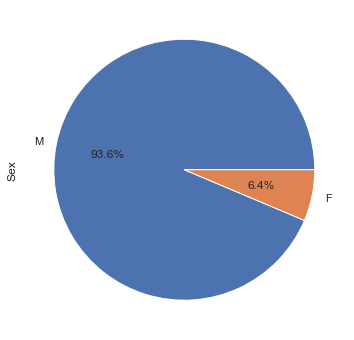

In [88]:
#A plot to show the ratio of male/female surfers in the data
data = df[(df["Activity"] == "Surfing")]["Sex"].value_counts()
plot_ = data.plot.pie(autopct="%.1f%%")
plot_.figure.savefig("output/images/male_female_data.png", dpi=1000)
#It's clear that they could target thedevice to males

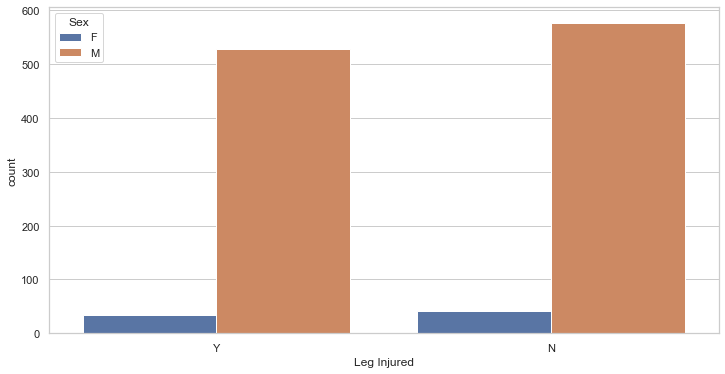

In [89]:
#Surfer leg injuries by sex
plot_ = sns.countplot(x=df[(df["Activity"] == "Surfing")]["Leg Injured"], hue=df["Sex"])
plot_.figure.savefig("output/images/male_female_leg_data.png", dpi=1000)

In [90]:
#Age market analysis:

In [91]:
#Age column is still not clean, I'll use another cleaning function to get rid of all the data that doesn''t give me info
df["Age"].unique()

array(['57', '11', '48', nan, '52', '15', '12', '32', '10', '21', '34',
       '30', '60', '33', '29', '54', '41', '37', '56', '19', '25', '69',
       '18', '38', '55', '35', '46', '45', '14', '40', '28', '20', '24',
       '26', '7', '31', '17', '13', '42', '3', '8', '50', '16', '82',
       '73', '68', '51', '39', '58', '22', '47', '61', '65', '36', '66',
       '43', '9', '49', '72', '59', '6', '27', '64', '23', '71', '44',
       '62', '63', '70', '53', 'Teen', 'teen', '77', '5', '86', 'Teens',
       '\xa0 ', ' ', '6½', '75', '87', '67', 'Elderly', 'adult', '1',
       '(adult)', 'X', 'MAKE LINE GREEN', '81', '"young"', 'young', '  '],
      dtype=object)

In [92]:
#I get rid of them with this function (I actually trasform them to NaN)
df["Age"] = df["Age"].apply(age2)

In [93]:
#And I get rid of all the NaN
df = df[df['Age'].notna()]

In [94]:
#Finally, I cast age data to integers
df = df.astype({"Age": int})

In [95]:
#Now it's clean
df["Age"].unique()

array([57, 11, 48, 52, 15, 12, 32, 10, 21, 34, 30, 60, 33, 29, 54, 41, 37,
       56, 19, 25, 69, 18, 38, 55, 35, 46, 45, 14, 40, 28, 20, 24, 26,  7,
       31, 17, 13, 42,  3,  8, 50, 16, 82, 73, 68, 51, 39, 58, 22, 47, 61,
       65, 36, 66, 43,  9, 49, 72, 59,  6, 27, 64, 23, 71, 44, 62, 63, 70,
       53, 77,  5, 86, 75, 87, 67,  1, 81])

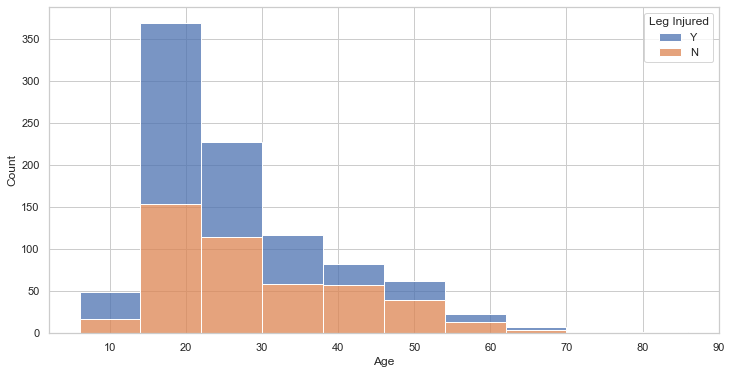

In [101]:
#Most surfers (and specifically most surfers that got their leg injured) are young (teens to thirties)
plot_ = sns.histplot(data=df[df["Activity"]=="Surfing"], x="Age", hue="Leg Injured", multiple="stack", bins=10)
plot_.figure.savefig("output/images/age_leg_data.png", dpi=1000)